In [1]:
import numpy as np

In [209]:
f = open("boxes.txt","r")
height = 4032
width = 3024

content = f.readlines()
file_array = []
for row in content:
    file_array.append(row.split())
    

In [211]:
def convertFormat(file_array):
    height = 4032
    width = 3024
    dict_objects = {}
    for row in file_array:
        try:
            float(row[1])
            l = int(row[2])
            t = int(row[3])
            r = int(row[4])
            b = int(row[5])
            bw = abs(r-l)
            bh = abs(t-b)

            if(row[0] in dict_objects.keys()):
                dict_objects[row[0]].append([(l+bw/2.0)/width,(t+bh/2.0)/height,bw/width,bh/height])
            else:
                dict_objects[row[0]] = []
                dict_objects[row[0]].append([(l+bw/2.0)/width,(t+bh/2.0)/height,bw/width,bh/height])

        except:
            print("Invalid")
    return dict_objects

In [363]:
'''
Now finish the function to compute the iou between two given box.

You can refer to the website: https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/

'''

def bbox_iou(boxA, boxB):
    '''your code here'''
    
    box1=[boxA[0]-(boxA[2]/2.0),boxA[1]-(boxA[3]/2.0),boxA[0]+(boxA[2]/2.0),boxA[1]+(boxA[3]/2.0)]
    box2=[boxB[0]-(boxB[2]/2.0),boxB[1]-(boxB[3]/2.0),boxB[0]+(boxB[2]/2.0),boxB[1]+(boxB[3]/2.0)]
    
    xA = max(box1[0],box2[0])
    yA = max(box1[1],box2[1])
    xB = min(box1[2],box2[2])
    yB = min(box1[3],box2[3])
    
    interArea = abs(xB-xA)*abs(yB-yA)
    box1Area = abs(box1[2]-box1[0])*abs(box1[3]-box1[1])
    box2Area = abs(box2[2]-box2[0])*abs(box2[3]-box2[1])
#     print(interArea,box2Area)
    iou = interArea / float(box2Area)
    return iou

In [364]:
def chair_iou(boxA, boxB,avg_chair_size):
    '''your code here'''
    
    box1=[boxA[0]-(boxA[2]/2.0),boxA[1]-(boxA[3]/2.0),boxA[0]+(boxA[2]/2.0),boxA[1]+(boxA[3]/2.0)]
    box2=[boxB[0]-(boxB[2]/2.0),boxB[1]-(boxB[3]/2.0),boxB[0]+(boxB[2]/2.0),boxB[1]+(boxB[3]/2.0)]
    
    xA = max(box1[0],box2[0])
    yA = max(box1[1],box2[1])
    xB = min(box1[2],box2[2])
    yB = min(box1[3],box2[3])
    
    interArea = abs(xB-xA)*abs(yB-yA)
    box1Area = abs(box1[2]-box1[0])*abs(box1[3]-box1[1])
    box2Area = abs(box2[2]-box2[0])*abs(box2[3]-box2[1])
    iou = interArea / float(avg_chair_size)
    return iou

In [389]:
dic = convertFormat(file_array)
for table in dic["diningtable"][1:]:
    dic["diningtable"][1][2] = dic["diningtable"][1][2]+0.3
    dic["diningtable"][1][3] = dic["diningtable"][1][3]
    dict_objects_within_table = {}
    
    dict_objects_within_table["chair"] =[];
    
    for chair in (dic["chair"]):
        
        if(bbox_iou(table,chair)>0.5):
            print(bbox_iou(table,chair))
            dict_objects_within_table["chair"].append(np.array(chair))
    dict_objects_within_table["person"] =[];
    
    for person in (dic["person"]):
        if(bbox_iou(table,person)>0.5):
            print("IOU is:",bbox_iou(table,chair))
            print(person)
            dict_objects_within_table["person"].append(np.array(person))

Invalid
1.0
1.0
1.0
1.0
IOU is: 1.0
[0.2131283068783069, 0.05295138888888889, 0.15773809523809523, 0.10143849206349206]
IOU is: 1.0
[0.2552910052910053, 0.5889136904761905, 0.2414021164021164, 0.19618055555555555]
IOU is: 1.0
[0.6827050264550265, 0.3758680555555556, 0.1703042328042328, 0.21949404761904762]
IOU is: 1.0
[0.7180886243386243, 0.6030505952380952, 0.19146825396825398, 0.29637896825396826]


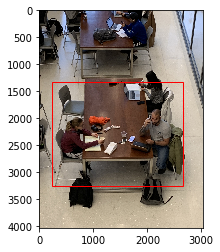

In [390]:
fig,ax = plt.subplots()
ax.imshow(mpimg.imread('IMG_5702.jpeg'))

box = dic["diningtable"][1]

wid = box[2]*width/2.0
hei = box[3]*height/2.0

rect = patches.Rectangle((box[0]*width-wid,box[1]*height-hei),box[2]*width,box[3]*height,facecolor='none',linewidth=1,edgecolor='r')

ax.add_patch(rect)


# plt.scatter(get_box(output)[0]*640, get_box(output)[1]*360, s=50, c='red', marker='o')
# plt.scatter(get_box(output)[2]*640, get_box(output)[3]*360, s=50, c='red', marker='o')

# plt.scatter(l[0]*640, l[1]*360, s=50, c='blue', marker='o')
# plt.scatter(l[2]*640, l[3]*360, s=50, c='blue', marker='o')

plt.show()

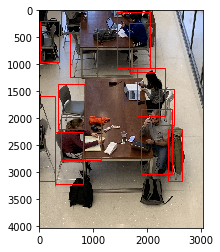

In [391]:
fig,ax = plt.subplots()
ax.imshow(mpimg.imread('IMG_5702.jpeg'))

for key,val in dic.items():
    for v in val:
        if(key=="chair" or key =="person"):
            box = v
            
            wid = box[2]*width/2.0
            hei = box[3]*height/2.0

            rect = patches.Rectangle((box[0]*width-wid,box[1]*height-hei),box[2]*width,box[3]*height,facecolor='none',linewidth=1,edgecolor='r')

            ax.add_patch(rect)

plt.show()

In [392]:

def get_avg(dict_objects_within_table):
    avg_chair_width = 0
    avg_chair_height = 0
    for chair in dict_objects_within_table["chair"]:

        avg_chair_width += chair[2]
        avg_chair_height += chair[3]
    avg_chair_width /= 4
    avg_chair_height /= 4

    avg_person_width = 0
    avg_person_height = 0
    for chair in dict_objects_within_table["person"]:

        avg_person_width += person[2]
        avg_person_height += person[3]
    avg_person_width /= 4
    avg_person_height /= 4
    return avg_chair_width,avg_chair_height,avg_person_width,avg_person_height

In [393]:
chair_w,chair_h,person_w,person_h = get_avg(dict_objects_within_table)

In [394]:
dict_objects_within_table["person"]

[array([0.21312831, 0.05295139, 0.1577381 , 0.10143849]),
 array([0.25529101, 0.58891369, 0.24140212, 0.19618056]),
 array([0.68270503, 0.37586806, 0.17030423, 0.21949405]),
 array([0.71808862, 0.6030506 , 0.19146825, 0.29637897])]

In [412]:
dict_objects_within_table["person"] = np.array(dict_objects_within_table["person"])
dict_objects_within_table["person"][:,2] = person_w
dict_objects_within_table["person"][:,3] = person_h

dict_objects_within_table["chair"] = np.array(dict_objects_within_table["chair"])
dict_objects_within_table["chair"][:,2] = chair_w
dict_objects_within_table["chair"][:,3] = chair_h

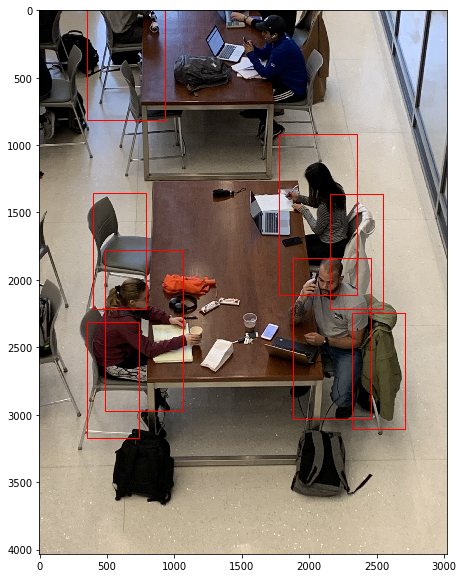

In [414]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(mpimg.imread('IMG_5702.jpeg'))

for key,val in dict_objects_within_table.items():
    for v in val:
        if(key=="chair"):
            box = v
            
            wid = box[2]*width/2.0
            hei = box[3]*height/2.0

            rect = patches.Rectangle((box[0]*width-wid,box[1]*height-hei),box[2]*width,box[3]*height,facecolor='none',linewidth=1,edgecolor='r')

            ax.add_patch(rect)
        if(key =="person"):
            box = v
            
            wid = box[2]*width/2.0
            hei = box[3]*height/2.0

            rect = patches.Rectangle((box[0]*width-wid,box[1]*height-hei),box[2]*width,box[3]*height,facecolor='none',linewidth=1,edgecolor='r')

            ax.add_patch(rect)

plt.show()

To check filtered items:

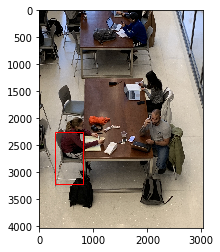

In [332]:
fig,ax = plt.subplots()
ax.imshow(mpimg.imread('IMG_5702.jpeg'))

box = dict_objects_within_table["chair"][2]

wid = box[2]*width/2.0
hei = box[3]*height/2.0

rect = patches.Rectangle((box[0]*width-wid,box[1]*height-hei),box[2]*width,box[3]*height,facecolor='none',linewidth=1,edgecolor='r')

ax.add_patch(rect)


# plt.scatter(get_box(output)[0]*640, get_box(output)[1]*360, s=50, c='red', marker='o')
# plt.scatter(get_box(output)[2]*640, get_box(output)[3]*360, s=50, c='red', marker='o')

# plt.scatter(l[0]*640, l[1]*360, s=50, c='blue', marker='o')
# plt.scatter(l[2]*640, l[3]*360, s=50, c='blue', marker='o')

plt.show()

For chair occupancy detection, we can see the area of the chair that is occupied. If area of chair-area of any intersect > than a fixed value

Or rather the area of intersect is a certain percentage of the chair area then its occupied.

In [336]:
sum_iou = np.zeros(4)



for i,chair in enumerate(dict_objects_within_table["chair"]):
    for person in dict_objects_within_table["person"]:
#         print(chair_iou(chair,person))
        sum_iou[i] += chair_iou(chair,person,avg_chair_size)

In [337]:
dict_objects_within_table["chair"]

[[0.8310185185185185,
  0.6639384920634921,
  0.08928571428571429,
  0.23809523809523808],
 [0.777281746031746,
  0.4437003968253968,
  0.09093915343915344,
  0.16319444444444445],
 [0.18022486772486773,
  0.6798115079365079,
  0.17526455026455026,
  0.23958333333333334],
 [0.19675925925925927,
  0.4429563492063492,
  0.16137566137566137,
  0.20932539682539683]]

In [338]:
sum_iou

array([10.12648955,  4.86843274,  6.08593829,  4.32145994])

In [297]:
for key,value in dict_objects_within_table.items():
    sum

SyntaxError: unexpected EOF while parsing (<ipython-input-297-a35f1b692ca8>, line 2)

In [223]:
dict_objects_within_table

{'chair': [[0.8310185185185185,
   0.6639384920634921,
   0.08928571428571429,
   0.23809523809523808],
  [0.18022486772486773,
   0.6798115079365079,
   0.17526455026455026,
   0.23958333333333334],
  [0.19675925925925927,
   0.4429563492063492,
   0.16137566137566137,
   0.20932539682539683]],
 'person': [[0.2131283068783069,
   0.05295138888888889,
   0.15773809523809523,
   0.10143849206349206],
  [0.2552910052910053,
   0.5889136904761905,
   0.2414021164021164,
   0.19618055555555555],
  [0.6827050264550265,
   0.3758680555555556,
   0.1703042328042328,
   0.21949404761904762],
  [0.7180886243386243,
   0.6030505952380952,
   0.19146825396825398,
   0.29637896825396826]]}

In [166]:
dic["chair"][0]

[0.8310185185185185,
 0.6639384920634921,
 0.08928571428571429,
 0.23809523809523808]

In [168]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

In [196]:
dict_objects_within_table

{'chair': [[0.8310185185185185,
   0.6639384920634921,
   0.08928571428571429,
   0.23809523809523808],
  [0.046957671957671955,
   0.5882936507936508,
   0.09391534391534391,
   0.39285714285714285]],
 'person': [[0.2131283068783069,
   0.05295138888888889,
   0.15773809523809523,
   0.10143849206349206],
  [0.2552910052910053,
   0.5889136904761905,
   0.2414021164021164,
   0.19618055555555555],
  [0.6827050264550265,
   0.3758680555555556,
   0.1703042328042328,
   0.21949404761904762],
  [0.7180886243386243,
   0.6030505952380952,
   0.19146825396825398,
   0.29637896825396826]]}

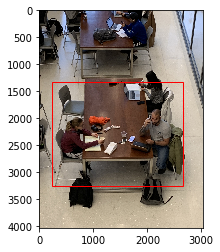

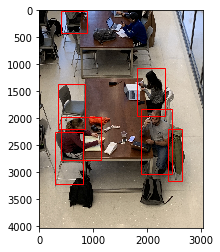

In [203]:
fig,ax = plt.subplots()
ax.imshow(mpimg.imread('IMG_5702.jpeg'))

for val in dict_objects_within_table.values():
    for v in val:
        box = v
#         box[2] = box[2]+0.3
        # box[3] = box[3]+0.1

        wid = box[2]*width/2.0
        hei = box[3]*height/2.0

        rect = patches.Rectangle((box[0]*width-wid,box[1]*height-hei),box[2]*width,box[3]*height,facecolor='none',linewidth=1,edgecolor='r')

        ax.add_patch(rect)


# plt.scatter(get_box(output)[0]*640, get_box(output)[1]*360, s=50, c='red', marker='o')
# plt.scatter(get_box(output)[2]*640, get_box(output)[3]*360, s=50, c='red', marker='o')

# plt.scatter(l[0]*640, l[1]*360, s=50, c='blue', marker='o')
# plt.scatter(l[2]*640, l[3]*360, s=50, c='blue', marker='o')

plt.show()

In [205]:
dict_objects_within_table

{'chair': [[0.8310185185185185,
   0.6639384920634921,
   0.08928571428571429,
   0.23809523809523808],
  [0.18022486772486773,
   0.6798115079365079,
   0.17526455026455026,
   0.23958333333333334],
  [0.19675925925925927,
   0.4429563492063492,
   0.16137566137566137,
   0.20932539682539683]],
 'person': [[0.2131283068783069,
   0.05295138888888889,
   0.15773809523809523,
   0.10143849206349206],
  [0.2552910052910053,
   0.5889136904761905,
   0.2414021164021164,
   0.19618055555555555],
  [0.6827050264550265,
   0.3758680555555556,
   0.1703042328042328,
   0.21949404761904762],
  [0.7180886243386243,
   0.6030505952380952,
   0.19146825396825398,
   0.29637896825396826]]}

BoxA and BoxB are of the format: (Centerx,centery,widthx,heighty) - Not accounting for the Width and Height of the Image, these have to be later scaled.

cell phone 0.40 2005 1937 2069 2032
laptop 0.81 1241 124 1534 394
diningtable 0.65 692 281 1789 1215
diningtable 0.81 693 1336 2216 3248
chair 0.36 2378 2197 2648 3157
chair 0.59 18 188 367 954
chair 0.69 0 1580 284 3164
chair 0.78 2213 1460 2488 2118
chair 0.93 1665 235 2134 1141
chair 0.95 280 2258 810 3224
chair 0.97 575 420 1063 1241
chair 1.00 351 1364 839 2208
cup 0.42 1091 2331 1207 2453
cup 0.46 1520 2229 1624 2464
handbag 0.43 570 2982 1009 3691
backpack 0.66 570 2982 1009 3691
backpack 0.77 1849 3096 2465 3603
person 0.41 406 9 883 418
person 0.82 1440 33 2045 1070
person 0.91 407 1979 1137 2770
person 0.99 1807 1073 2322 1958
person 0.99 1882 1834 2461 3029



In [43]:
# From example approximately 800/3000 ie: add to width on either side
percentage_beyond_table = 0.30 

In [62]:
image_width = 416
image_height = 416

predicted_class = np.array(["diningtable","laptop","chair","person","chair"])

box_cordinates = np.zeros((np.shape(predicted_class)[0],4))
box_cordinates[:,2] = box_cordinates[:,2] + 0.6

In [63]:
dict_objects = {}
for prediction in predicted_class:
    dict_objects[prediction] = box_cordinates[predicted_class == prediction]

In [64]:
dict_objects

{'diningtable': array([[0. , 0. , 0.6, 0. ]]),
 'laptop': array([[0. , 0. , 0.6, 0. ]]),
 'chair': array([[0. , 0. , 0.6, 0. ],
        [0. , 0. , 0.6, 0. ]]),
 'person': array([[0. , 0. , 0.6, 0. ]])}

In [80]:
dict_objects["diningtable"]

array([[0. , 0. , 0.6, 0. ]])

In [73]:
for table in dict_objects["diningtable"]:
    print(table)

[0.  0.  0.6 0. ]


In [201]:
dic["diningtable"]

[[0.41021825396825395,
  0.18551587301587302,
  0.6627645502645503,
  0.2316468253968254],
 [0.4809854497354497,
  0.5684523809523809,
  0.8036375661375661,
  0.4742063492063492]]

In [202]:
dic

{'laptop': [[0.45882936507936506,
   0.0642361111111111,
   0.09689153439153439,
   0.06696428571428571]],
 'diningtable': [[0.41021825396825395,
   0.18551587301587302,
   0.6627645502645503,
   0.2316468253968254],
  [0.4809854497354497,
   0.5684523809523809,
   0.8036375661375661,
   0.4742063492063492]],
 'chair': [[0.8310185185185185,
   0.6639384920634921,
   0.08928571428571429,
   0.23809523809523808],
  [0.06365740740740741,
   0.1416170634920635,
   0.11541005291005291,
   0.18998015873015872],
  [0.046957671957671955,
   0.5882936507936508,
   0.09391534391534391,
   0.39285714285714285],
  [0.777281746031746,
   0.4437003968253968,
   0.09093915343915344,
   0.16319444444444445],
  [0.6281415343915344,
   0.17063492063492064,
   0.1550925925925926,
   0.22470238095238096],
  [0.18022486772486773,
   0.6798115079365079,
   0.17526455026455026,
   0.23958333333333334],
  [0.2708333333333333,
   0.20597718253968253,
   0.16137566137566137,
   0.20362103174603174],
  [0.196759

In [187]:
for val in dict_objects_within_table.values():
    print(val)

[[0.8310185185185185, 0.6639384920634921, 0.08928571428571429, 0.23809523809523808], [0.18022486772486773, 0.6798115079365079, 0.17526455026455026, 0.23958333333333334], [0.19675925925925927, 0.4429563492063492, 0.16137566137566137, 0.20932539682539683]]
[[0.2131283068783069, 0.05295138888888889, 0.15773809523809523, 0.10143849206349206], [0.2552910052910053, 0.5889136904761905, 0.2414021164021164, 0.19618055555555555], [0.6827050264550265, 0.3758680555555556, 0.1703042328042328, 0.21949404761904762], [0.7180886243386243, 0.6030505952380952, 0.19146825396825398, 0.29637896825396826]]


In [81]:
dict_objects_within_table

{'chair': [], 'person': []}

In [48]:
# In the form centerx, centery, widthx, height
box_cordinates

array([[0. , 0. , 0.6, 0. ],
       [0. , 0. , 0.6, 0. ],
       [0. , 0. , 0.6, 0. ],
       [0. , 0. , 0.6, 0. ]])

In [65]:
# table_idx = predicted_class == "diningtable"
# table_coordinates = box_cordinates[table_idx]


In [66]:
# person_coordinates = box_cordinates[predicted_class == "person"]
# chair_coordinates = box_cordinates[predicted_class == "chair"]
# bag_coordinates = box_cordinates[predicted_class == "bag"]

In [40]:
table_coordinates

array([[0., 0., 0., 0.]])

In [58]:
objects_near_table = []
for table in table_coordinates:
    for obj in (person_coordinates,chair_coordinates):
        
        
    

[[0.  0.  0.6 0. ]]
[[0.  0.  0.6 0. ]]


In [3]:
from PIL import Image

In [27]:
image = Image.new("RGB", (100, 200), "red")

In [28]:
import matplotlib.pyplot as plt

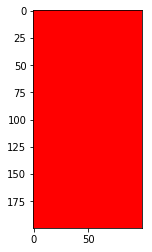

In [29]:
plt.imshow(image)

In [30]:
def get_pixel(image, i, j):
    # Inside image bounds?
    width, height = image.size
    if i > width or j > height:
      return None

    # Get Pixel
    pixel = image.getpixel((i, j))
    return pixel

In [31]:
image.load()

In [32]:
pixels = image.load()
for i in range(10):
    for j in range(25):
        pixels[i,j] = (0,255,0)
        

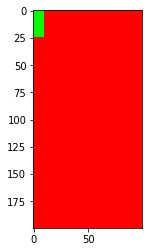

In [33]:
plt.imshow(image)

In [34]:
image.save('genimage.jpg','JPEG')

In [50]:
def generateSaveImage(topleft,topright,bottomleft,bottomright):
    image = Image.new("RGB", (100, 200), "red")
    pixels = image.load()
    
    if (topleft==1):
        for i in range(50):
            for j in range(100):
                pixels[i,j] = (0,255,0)
    if (topright==1):
        for i in range(50):
            for j in range(100):
                pixels[50+i,j] = (0,255,0)
    if (bottomleft==1):
        for i in range(50):
            for j in range(100):
                pixels[i,j+100] = (0,255,0)
    if (bottomright==1):
        for i in range(50):
            for j in range(100):
                pixels[i+50,j+100] = (0,255,0)
                
    for i in range(100):
        pixels[i,99] = (255,255,255)
        pixels[i,100] = (255,255,255)
        pixels[i,101] = (255,255,255)
        
    for i in range(200):
        pixels[51,i] = (255,255,255)
        pixels[50,i] = (255,255,255)
        pixels[49,i] = (255,255,255)
    plt.imshow(image)
    image.save('genimage.jpg','JPEG')

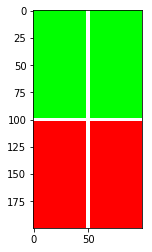

In [51]:
generateSaveImage(1,1,3,0)